(array([ 6., 18., 24., 12., 22., 11.,  5.,  1.,  0.,  1.]),
 array([-4.48943544, -3.18780975, -1.88618406, -0.58455838,  0.71706731,
         2.018693  ,  3.32031869,  4.62194438,  5.92357007,  7.22519576,
         8.52682145]),
 <BarContainer object of 10 artists>)

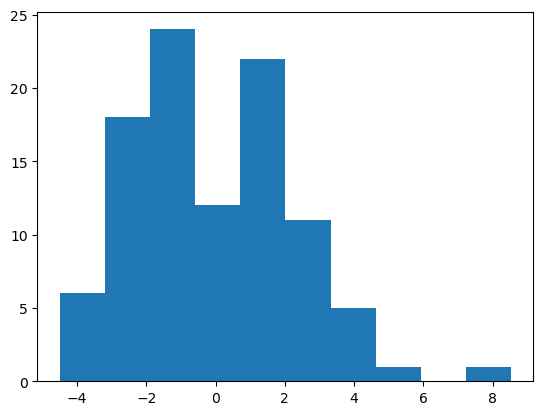

In [1]:
# rerunning main.ipynb using our own dataset
import matplotlib.pyplot as plt
import numpy as np
import random

mu = 0
sigma = 2.3
num_samples = 100

rng = np.random.default_rng()
sample_differences = rng.normal(loc=mu, scale=sigma, size=num_samples)

plt.hist(sample_differences)

actual function: y = 4.681980892422329 + 0.5311728704775304x


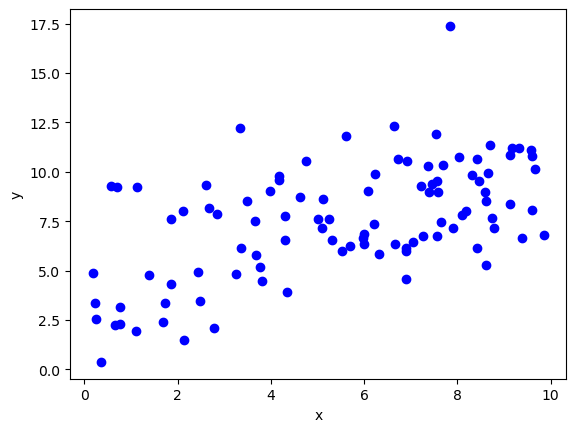

In [2]:
# creating scatter plot of our dataset
# trying to model y = 4.5 + 2.3x for x in [0, 10]

actual_a = np.random.normal(loc=5, scale=1.2, size=1)
actual_b = np.random.normal(loc=0, scale=2.3, size=1)
actual = lambda x: actual_a[0] + (actual_b[0] * x)

print(f'actual function: y = {float(actual_a)} + {float(actual_b)}x')

df_x = [random.uniform(0, 10) for i in range(num_samples)]
df_y = [actual(df_x[i]) + sample_differences[i] for i in range(num_samples)]

plt.scatter(df_x, df_y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
params = [10, 0]
pred = lambda x: params[0] + (params[1] * x)

print(pred(2))

def sum_residuals(multipliers = [1 for i in range(len(df_x))]):
    sum_error = 0

    for i in range(len(df_x)):
        sum_error += (df_y[i] - pred(df_x[i]))*multipliers[i]

    return sum_error

print(sum_residuals())

10
-245.70822014365243


In [4]:
def loss_function(n = len(df_x)):
    sum_squared = 0

    for i in range(n):
        residual = (df_y[i] - pred(df_x[i]))**2
        sum_squared += residual

    return sum_squared

print(loss_function())

1432.977688692915


In [5]:
alpha = 0.0002
epochs = 500

def simulation():
    results = {
        'run_num': [0],
        'total_error': [loss_function()]
    }

    for i in range(epochs):
        params[0] += 2 * alpha * sum_residuals()
        params[1] += 2 * alpha * sum_residuals(df_x)

        new_data = {
            'run_num': i + 1,
            'total_error': loss_function()
        }

        # print(f'new_data = {new_data}')

        results['run_num'].append(new_data['run_num'])
        results['total_error'].append(new_data['total_error'])

    return results

In [6]:
results = simulation()

print(params)

[4.477336422019871, 0.5608686056477254]


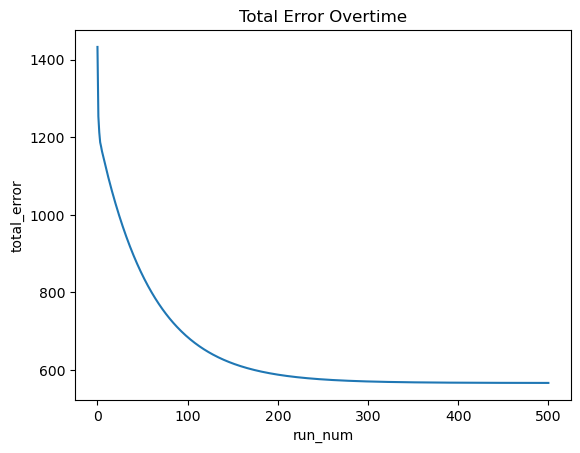

In [7]:
plt.plot(results['run_num'], results['total_error'])
plt.xlabel('run_num')
plt.ylabel('total_error')
plt.title('Total Error Overtime')

plt.show()

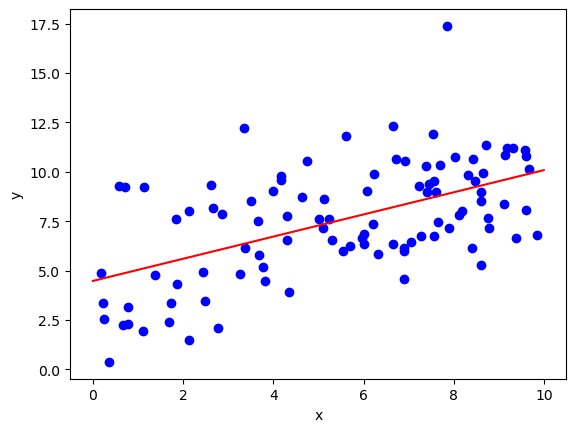

In [ ]:
x_list = [x/100 for x in range(0, 1000)]
y_predict = [params[0] + (x * params[1]) for x in x_list]

plt.scatter(df_x, df_y, color='blue')
plt.plot(x_list, y_predict, color='red', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('')

plt.show()

[5.997268373973496, 3.4596799055250385, 2.3897106123501892, 3.1703560648338502, 2.2596698654704417, 7.1496908419854, 6.624625418272189, 4.322067115067582, 4.912276894787395, 7.178099665099101, 8.392682360689228, 10.52661398683171, 1.962061205527677, 7.59161744337202, 5.263224204764631, 4.859510134236821, 6.162817224251478, 9.29175374370568, 10.623544606322266, 3.343596072439315, 9.026270109875478, 10.556461000012973, 6.16317034013421, 4.802449844950495, 6.332542594774997, 17.377607122848836, 6.143080948282398, 6.861770212644705, 7.607033764870613, 4.463051362163028, 12.327014920608523, 8.060585970265983, 3.344122949517862, 6.223594762042724, 9.231666485622426, 12.211497019293105, 9.511974150046905, 6.665718133432646, 10.6340660254458, 6.802093282319986, 10.333703691463484, 2.3142383528590234, 9.527417171482911, 2.5604650113631497, 9.81480838030148, 8.530236598794014, 5.9773338044275235, 8.507484669881274, 5.815402166476858, 11.226196832511432, 9.562276162488725, 7.646367101168918, 9.33

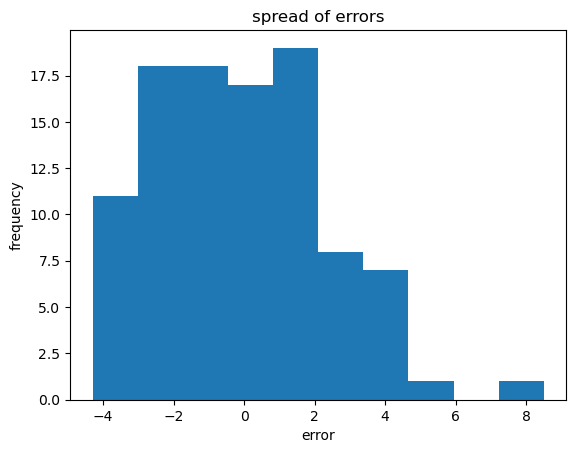

In [9]:
errors = [df_y[i] - pred(df_x[i]) for i in range(len(df_x))]

print(df_y)

plt.hist(errors)
plt.xlabel('error')
plt.ylabel('frequency')
plt.title('spread of errors')

plt.show()